# NAMA MUHAMAD ILHAM NUR HABIBIE WIBOWO
KELAS CHERNO

In [ ]:
#Menampilkan Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
# Membaca dataset MovieLens 1M
movies = pd.read_csv('/content/gdrive/MyDrive/Python TIA/ml-1m/movies.dat', sep='::', engine='python', header=None, names=['movieId', 'title', 'genres'], encoding='latin-1')

In [ ]:
# Membaca dataset MovieLens 1M
ratings = pd.read_csv('/content/gdrive/MyDrive/Python TIA/ml-1m/ratings.dat', sep='::', engine='python', header=None, names=['userId', 'movieId', 'rating', 'timestamp'])

In [ ]:
# Membaca dataset MovieLens 1M
users = pd.read_csv('/content/gdrive/MyDrive/Python TIA/ml-1m/users.dat', sep='::', engine='python', header=None, names=['userId', 'gender', 'age', 'occupation', 'zip'])

In [ ]:
#Menggabungkan data movies, ratings, dan users berdasarkan kolom "movieId"
data = pd.merge(pd.merge(ratings, users), movies, on='movieId')

In [ ]:
# Membuat pivot table untuk menghitung nilai rata-rata peringkat yang diberikan oleh wanita untuk setiap film
pivot_table = pd.pivot_table(data, values='rating', index='title', columns='gender', aggfunc='mean')

In [ ]:
# Mengurutkan film berdasarkan nilai rata-rata peringkat yang diberikan oleh wanita
sorted_by_women_ratings = pivot_table.sort_values(by='F', ascending=False)

**JAWABAN NOMER 1 = FILM YANG PALING DI SENANGI OLEH PARA WANITA ADALAH Clean Slate (Coup de Torchon) (1981)**

In [ ]:
# Menampilkan film yang paling disenangi oleh para wanita (film dengan nilai rata-rata peringkat wanita tertinggi)
most_liked_by_women = sorted_by_women_ratings.head(1)
print(most_liked_by_women)


gender                                  F         M
title                                              
Clean Slate (Coup de Torchon) (1981)  5.0  3.857143


In [ ]:
# Menambahkan kolom "rating_diff" untuk menyimpan perbedaan rata-rata peringkat antara pria dan wanita
pivot_table['rating_diff'] = pivot_table['F'] - pivot_table['M']

In [ ]:
# Mengurutkan film berdasarkan perbedaan rata-rata peringkat
sorted_by_rating_diff = pivot_table.sort_values(by='rating_diff', ascending=False)

**JAWABAN NOMER 2 = FILM YANG PALING BERPOTENSI MENYEBABKAN PERBEDAAN PENDAPAT ANTA MEN AND WOMEN ADALAH James Dean Story, The (1957)**

In [ ]:
# Menampilkan film yang paling berpotensi menyebabkan perbedaan pendapat antara pria dan wanita
most_controversial_movie = sorted_by_rating_diff.head(1)

print(most_controversial_movie)

gender                          F    M  rating_diff
title                                              
James Dean Story, The (1957)  4.0  1.0          3.0


In [ ]:
# Membaca dataset MovieLens 1M (movies.dat)
movies['year'] = movies['title'].apply(lambda x: re.findall(r'\((\d{4})\)', x)[0] if re.findall(r'\((\d{4})\)', x) else '')

In [ ]:
# Mengambil tahun dari kolom "movie title" menggunakan regex
movies['year'] = movies['title'].apply(lambda x: re.findall(r'\((\d{4})\)', x)[0] if re.findall(r'\((\d{4})\)', x) else '')

In [ ]:
# Menghitung jumlah film berdasarkan tahun
film_count_by_year = movies['year'].value_counts().sort_index()

**JAWABAN NOMER 3 = Buatlah grafik bar berikut (hint: extract tahun pada kolom movie title berdasarkan pattern regex berikut '.*\((.*)\).*')
**

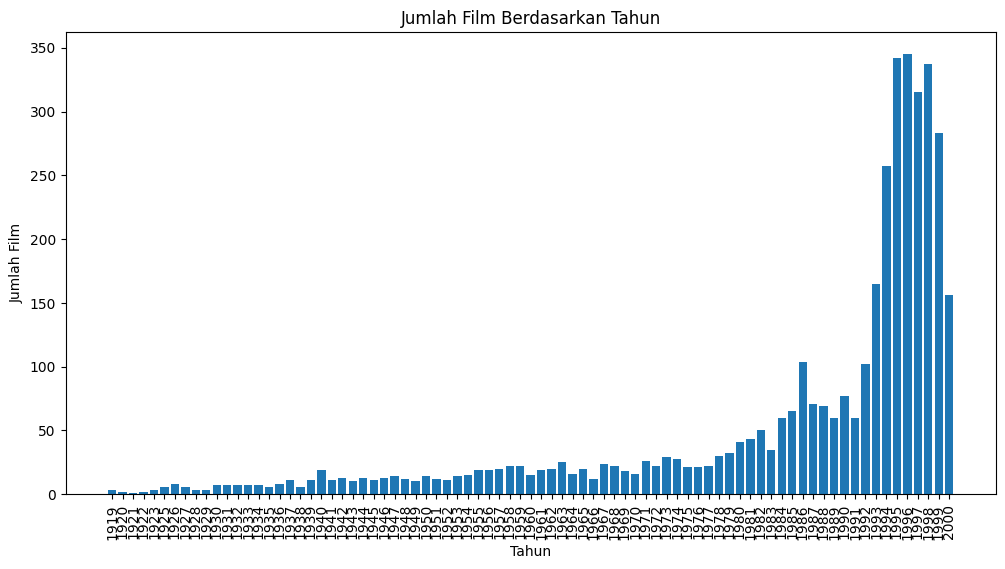

In [ ]:
# Membuat grafik bar
plt.figure(figsize=(12, 6))
plt.bar(film_count_by_year.index, film_count_by_year.values)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Film')
plt.title('Jumlah Film Berdasarkan Tahun')
plt.xticks(rotation=90)
plt.show()